# Visualisation of post and comments structure

#### 1. Documentation
- <>

#### 2. Examples
- <>

#### Libraries

In [2]:
#database management
import sqlite3
import pandas as pd
import numpy as np 

#data visualisation
import seaborn as sns

import matplotlib.pyplot as plt

import powerlaw
sns.set_style('darkgrid')

## 1. Extracting data

In [2]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/trump_election.db')
# 2. Full dataset
df_trump = pd.read_sql('''SELECT author, parent_author, 
                                age_comment,
                                age_post, body_length,
                                n_conn, 
                                num_comments, score, 
                                nlp_label, time_label,
                                quarter, month, type, post_id
                    FROM Reddit
                    ORDER BY score DESC''', conn) 
df_trump

,author,parent_author,age_comment,age_post,body_length,n_conn,num_comments,score,nlp_label,time_label,quarter,month,type,post_id
0,ajb160,ajb160,0,0,67,1562,6675,32402,Positive,<=8 hours,1,3,Post,4cbbg8
1,k4lifrag,k4lifrag,0,0,75,592,5681,32114,Positive,<=8 hours,4,12,Post,5i3c9k
2,mafco,mafco,0,0,52,553,4966,32027,Very Negative,<=8 hours,3,7,Post,4ulrde
3,GetToDaChoppa1,GetToDaChoppa1,0,0,91,833,4971,31969,Very Negative,<=8 hours,3,7,Post,4tx4ps
4,AlternativeHillbilly,AlternativeHillbilly,0,0,40,250,3413,31861,Neutral,<=8 hours,4,11,Post,5d9uc7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496234,None,None,0,0,79,533,4192,-32064,Positive,<=8 hours,4,11,Post,5bj5mv
4496235,WildAnimus,WildAnimus,0,0,196,383,3020,-32275,Positive,<=8 hours,1,3,Post,492viu
4496236,WildAnimus,WildAnimus,0,0,110,417,3317,-32432,Neutral,<=8 hours,4,10,Post,591def
4496237,nantesorkestar,nantesorkestar,0,0,56,703,6347,-32588,Very Positive,<=8 hours,4,12,Post,5jsgsc


In [3]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/obama_election.db')
# 2. Full dataset
df_obama = pd.read_sql('''SELECT  author, parent_author, 
                                age_comment,
                                age_post, body_length,
                                n_conn, 
                                num_comments, score, 
                                nlp_label, time_label,
                                quarter, month, type, post_id
                    FROM Reddit
                    ORDER BY score DESC''', conn) 
df_obama

,author,parent_author,age_comment,age_post,body_length,n_conn,num_comments,score,nlp_label,time_label,quarter,month,type,post_id
0,LaimeJannister,LaimeJannister,0,0,84,597,1704,5266,Neutral,<=8 hours,3,9,Post,101wri
1,obsa,obsa,0,0,122,160,784,4931,Very Positive,<=8 hours,4,12,Post,14u7pd
2,ornatedwithwater,ornatedwithwater,0,0,112,389,1690,4863,Very Positive,<=8 hours,3,8,Post,yv4a1
3,Chenzorama,Chenzorama,0,0,113,1212,5307,4851,Neutral,<=8 hours,3,9,Post,101fk5
4,None,None,0,0,100,826,2248,4823,Negative,<=8 hours,4,10,Post,11zc4u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044988,jewoven,rebel581,2055,9466,80,6,1288,-285,Negative,<=8 hours,4,10,Comments,11ceb1
2044989,[deleted],nowhathappenedwas,20698,20698,9,3,1233,-290,Neutral,<=8 hours,1,3,Comments,qilkj
2044990,Grue,prettymuchdrunk,4461,6093,117,15,1067,-475,Very Positive,<=8 hours,3,8,Comments,xmd8x
2044991,[deleted],[deleted],500,5036,9,26,815,-543,Neutral,<=8 hours,4,11,Comments,12m3n4


## 2. General analysis

#### 2.1 Score vs. comments

In [ ]:
def score_plot(df):
    df_posts=df.loc[df['type'] == "Post"]
    # plot size
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'hspace': .3, 'wspace': .3})

    row=0
    column=0
    for quarters in [1,2,3,4]:
        # Filtering data
        df_filter=df_posts.loc[df_posts['quarter']==quarters]    
         # List of posts
        q1_list=df_filter["month"].sort_values().unique()    
        # Plots
        for elements in q1_list:
            df_element=df_filter.loc[df_filter['month'] == elements]
            sns.regplot(x='score', y='num_comments', data=df_element, ax= axes[row, column], label="Month {}".format(elements), fit_reg=False, scatter_kws={'s':5})



        # Labels
        axes[row, column].set_title('Distribution plot for Q{}'.format(quarters))
        axes[row, column].set_xlabel("Score")
        axes[row, column].set_ylabel("Number of comments")
        # Axes 
        axes[row, column].legend()
        axes[row, column].set_xlim(-35000, 35000)
        axes[row, column].set_ylim(0, 30000)
        #axes[row, column].set_xscale("log")
        #axes[row, column].set_yscale("log")


        if column==1:
            row=1
            column=-1
        column+=1
   

In [ ]:
score_plot(df_trump)
plt.savefig(r'Visualisations/1_score_2016.png', bbox_inches='tight')
plt.show()

In [ ]:
score_plot(df_obama)
plt.savefig(r'Visualisations/1_score_2012.png', bbox_inches='tight')
plt.show()

To do: reject outliers

In [ ]:
# 1. Extracting and preparing the dataset:
conn1 = sqlite3.connect("Data/obama_election.db")
#conn1 = sqlite3.connect("Data/obama_election.db")
# 2. Full dataset
obama_comm = pd.read_sql('''SELECT Count(*) as count
                                FROM Reddit
                                group by post_id                                
                                ''', conn1) 
obama_comm

In [ ]:
# 1. Extracting and preparing the dataset:
conn1 = sqlite3.connect("Data/trump_election.db")
#conn1 = sqlite3.connect("Data/obama_election.db")
# 2. Full dataset
trump_comm = pd.read_sql('''SELECT Count(*) as count
                                FROM Reddit
                                group by post_id                                
                                ''', conn1) 
trump_comm

In [ ]:
import matplotlib.ticker as ticker

In [ ]:
def author_plot(df_in_1, df_in_2):
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .15})
    
    # plot 1    
    sns.distplot(df_in_1["count"], bins=100, ax=axes[0])
    #axes[0].set_xlim(0, 20000) 
    axes[0].set_ylim(0, 0.0007) 
    axes[0].set_title('Number of comments per post in 2012',fontsize=15)
    axes[0].set_xlabel("Number of comments",fontsize=10)
    #axes[0].set_ylabel("Percentage of comments",fontsize=10)
    
    # plot 2
    sns.distplot(df_in_2["count"], bins=100, ax=axes[1])
    #axes[1].set_xlim(0, 20000) 
    axes[1].set_ylim(0, 0.0007) 
    axes[1].set_title('Number of comments per post in 2016',fontsize=15)
    axes[1].set_xlabel("Number of comments",fontsize=10)
    #axes[1].set_ylabel("Percentage of comments",fontsize=10)


In [ ]:
author_plot(obama_comm, trump_comm)
plt.savefig(r'Visualisations/2_comment_num.png', bbox_inches='tight')
plt.show()

In [ ]:
print(obama_comm["count"].mean())
print(trump_comm["count"].mean())

## 3. Time analysis

#### 3.1 Comments distirbution in time

In [ ]:
def time_plot(df_in_1, df_in_2):
    # data 1
    df1=df_in_1.groupby(['month','time_label'])['time_label'].count().unstack(0).rename_axis([None], axis=1)
    for elements in df1.columns.unique(): 
        df1[elements]=df1[elements]/df1[elements].sum()
    df1 = df1.reindex(index = ["<=8 hours","<=16 hours","<=24 hours","<=7 days","<=1 month"])

    # data 2
    df2=df_in_2.groupby(['month','time_label'])['time_label'].count().unstack(0).rename_axis([None], axis=1)
    for elements in df2.columns.unique(): 
        df2[elements]=df2[elements]/df2[elements].sum()
    df2 = df2.reindex(index = ["<=8 hours","<=16 hours","<=24 hours","<=7 days","<=1 month"])

    
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .15})
    
    # plot 1    
    df1.plot.bar(colormap="Paired", ax=axes[0])
    #axes[0].set_xlim(0, 1) 
    axes[0].set_ylim(0, 1) 
    axes[0].set_title('Percentage distribution in time groups of 2012',fontsize=15)
    axes[0].set_xlabel("Time group",fontsize=10)
    axes[0].set_ylabel("Percentage of comments",fontsize=10)
    
    # plot 2
    df2.plot.bar(title="Percentage distribution in time groups of 2016", colormap="Paired", ax=axes[1])
    #axes[1].set_xlim(0, 1) 
    axes[1].set_ylim(0, 1) 
    axes[1].set_title('Percentage distribution in time groups 2016',fontsize=15)
    axes[1].set_xlabel("Time group",fontsize=10)
    axes[1].set_ylabel("Percentage of comments",fontsize=10)
        

In [ ]:
time_plot(df_obama,df_trump)
plt.savefig(r'Visualisations/2_Time_groups.png', bbox_inches='tight')
plt.show()

#### 3.2 Posts that have comments in first 8 hours

In [ ]:
# 1. Extracting and preparing the dataset:
conn1 = sqlite3.connect("Data/trump_election.db")
# 2. Full dataset
trump_posts = pd.read_sql('''SELECT post_id, score
                            FROM Reddit
                            WHERE type='Post' AND post_id IN (SELECT distinct post_id
                                                            FROM Reddit
                                                            GROUP BY post_id     
                                                            HAVING max(age_post)<=28800)
                            ORDER BY score DESC
                            ''', conn1) 
# show
trump_posts

In [ ]:
# 1. Extracting and preparing the dataset:
conn2 = sqlite3.connect("Data/obama_election.db")
# 2. Full dataset
obama_posts = pd.read_sql('''SELECT post_id, score
                            FROM Reddit
                            WHERE type='Post' AND post_id IN (SELECT distinct post_id
                                                            FROM Reddit
                                                            GROUP BY post_id     
                                                            HAVING max(age_post)<=28800)
                            ORDER BY score DESC
                            ''', conn2) 
# show
obama_posts

#### 3.3 PDV for time

In [ ]:
def time_plot(df_in_1, df_in_2):
    # data 1
    df_in_1['hours']=(df_in_1['age_post']/(60*60)).round()
    # Frequency
    df_1 = df_in_1.groupby('hours')['hours'].agg('count').pipe(pd.DataFrame).rename(columns = {'hours': 'frequency'})
    # PDF
    df_1['pdf'] = df_1['frequency'] / sum(df_1['frequency'])
    # CDF
    df_1['cdf'] = df_1['pdf'].cumsum()
    df_1 = df_1.reset_index()


    # data 2
    df_in_2['hours']=(df_in_2['age_post']/(60*60)).round()
    # Frequency
    df_2 = df_in_2.groupby('hours')['hours'].agg('count').pipe(pd.DataFrame).rename(columns = {'hours': 'frequency'})
    # PDF
    df_2['pdf'] = df_2['frequency'] / sum(df_2['frequency'])
    # CDF
    df_2['cdf'] = df_2['pdf'].cumsum()
    df_2 = df_2.reset_index()
    
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .15})
    
    # plot 1    
    df_1.plot(x = 'hours', y = ['pdf', 'cdf'], grid = True, ax=axes[0])
    axes[0].set_xlim(0, 15) 
    #axes[0].set_ylim(0, 1) 
    axes[0].set_title('CDF and PDF for 2012',fontsize=15)
    axes[0].set_xlabel("Hours passed from post creation",fontsize=10)
    #axes[0].set_ylabel("Percentage of comments",fontsize=10)
    
    # plot 2
    df_2.plot(x = 'hours', y = ['pdf', 'cdf'], grid = True, ax=axes[1])
    axes[1].set_xlim(0, 15) 
    #axes[1].set_ylim(0, 1) 
    axes[1].set_title('CDF and PDF for 2016',fontsize=15)
    axes[1].set_xlabel("Hours passed from post creation",fontsize=10)
    #axes[1].set_ylabel("Percentage of comments",fontsize=10)
        

In [ ]:
time_plot(df_obama,df_trump)
plt.savefig(r'Visualisations/2_PDF_CDF.png', bbox_inches='tight')
plt.show()

## 4. Network analysis

#### 4.1 Connectivity of nodes and powerlaw function

In [ ]:
def conn_plot(df):
    # data
    df_conn=df[~df['author'].isin(['[deleted]','None'])].groupby('author', as_index=False).agg({"n_conn": "mean"}).sort_values(by=['n_conn'], ascending=False)
    df_conn["n_conn"]=df_conn["n_conn"].round()
    bins=df_conn['n_conn'].values[0].astype(int)
        
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .2})
    
    # plot histogram    
    sns.distplot(df_conn["n_conn"], bins=bins, ax=axes[0])
    axes[0].set_xlim(0, 10) 
    axes[0].set_title('Distribution of connections',fontsize=15)
    axes[0].set_xlabel("Average number of connections per user",fontsize=10)
    axes[0].set_ylabel("Percentage of users",fontsize=10)
    
    # plot powerlaw
    fit = powerlaw.Fit(df_conn["n_conn"] ,discrete=True)
    fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf', ax=axes[1])
    fit.plot_pdf( color= 'b', ax=axes[1])
    axes[1].set_title('Powerlaw function',fontsize=15)
    axes[1].set_xlabel("Node degree",fontsize=10)
    axes[1].set_ylabel("Percentage of nodes",fontsize=10)
    
    print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)
    plt.tight_layout()
    

In [ ]:
conn_plot(df_trump)
plt.savefig(r'Visualisations/3_power_law_2016.png', bbox_inches='tight')
plt.show()

In [ ]:
conn_plot(df_obama)
plt.savefig(r'Visualisations/3_power_law_2012.png', bbox_inches='tight')
plt.show()

## 5. Text analysis

#### 5.1 Number of characters vs time

https://typing-speed-test.aoeu.eu/

In [ ]:
def typing_plot(df_in_1, df_in_2):
    # data 1
    df_in_1["age_post"]=df_in_1["age_post"].astype('float').round()    
    df_1=df_in_1.loc[df_in_1["age_post"]<3600]
    
    # data 2
    df_in_2["age_post"]=df_in_2["age_post"].astype('float').round()  
    df_2=df_in_2.loc[df_in_2["age_post"]<3600]
    
    # subplot grid
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': .15})
    
    # plot 1    
    sns.scatterplot(x="age_post", y="body_length", hue="quarter", palette="Set1", data=df_1, ax=axes[0])    
    axes[0].plot(df_1["age_post"], df_1["age_post"]*3, 'r',  label="Average typing speed")
    axes[0].axvline(300, 0, 1, color="red", label="5 minutes", linestyle="dotted")
    axes[0].axvline(1800, 0, 1, color="red", label="30 minutes",linestyle="dashed")
        
    #axes[0].set_xlim(0, 1) 
    axes[0].set_ylim(0, 35000) 
    axes[0].set_title('Time vs typing speed in 2012',fontsize=15)
    axes[0].set_xlabel("Seconds passed from previous post/comment",fontsize=10)
    axes[0].set_ylabel("Number of characters in text",fontsize=10)
    
    # plot 2
    sns.scatterplot(x="age_post", y="body_length", hue="quarter", palette="Set1", data=df_2, ax=axes[1])    
    axes[1].plot(df_2["age_post"], df_2["age_post"]*3, 'r',  label="Average typing speed")
    axes[1].axvline(300, 0, 1, color="red", label="5 minutes", linestyle="dotted")
    axes[1].axvline(1800, 0, 1, color="red", label="30 minutes",linestyle="dashed")
        
    #axes[1].set_xlim(0, 1) 
    axes[1].set_ylim(0, 35000) 
    axes[1].set_title('Time vs typing speed in 2016',fontsize=15)
    axes[1].set_xlabel("Seconds passed from previous post/comment",fontsize=10)
    axes[1].set_ylabel("Number of characters in text",fontsize=10)
        

In [ ]:
typing_plot(df_obama,df_trump)
plt.savefig(r'Visualisations/4_text_speed.png', bbox_inches='tight')
plt.show()

## NLP analysis

#### Extracting data

In [40]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/obama_election.db')
# 2. Full dataset
obama_centrality = pd.read_sql('''SELECT nlp_label, (centrality_betweeness + centrality_closeness + centrality_degree + centrality_eigenvector + centrality_page_rank)/5 AS centrality_score
                                    FROM Reddit
                                    ORDER BY centrality_score DESC''', conn) 
obama_centrality

,nlp_label,centrality_score
0,Neutral,0.712598
1,Negative,0.644141
2,Very Negative,0.574512
3,Very Positive,0.526563
4,Negative,0.517920
...,...,...
2044988,Negative,0.000016
2044989,Negative,0.000016
2044990,Very Positive,0.000016
2044991,Neutral,0.000016


In [41]:
# 1. Extracting and preparing the dataset:
conn = sqlite3.connect('Data/trump_election.db')
# 2. Full dataset
trump_centrality = pd.read_sql('''SELECT nlp_label, (centrality_betweeness + centrality_closeness + centrality_degree + centrality_eigenvector + centrality_page_rank)/5 AS centrality_score
                                    FROM Reddit
                                    ORDER BY centrality_score DESC
                                    ''', conn) 
trump_centrality

,nlp_label,centrality_score
0,Neutral,0.585059
1,Neutral,0.495789
2,Very Negative,0.480151
3,Very Positive,0.469336
4,Very Negative,0.458691
...,...,...
4496234,Neutral,0.000005
4496235,Very Positive,0.000005
4496236,Positive,0.000005
4496237,Neutral,0.000005


#### Plot

In [46]:
from math import pi

In [47]:
def comment_plot(df_in_1, df_in_2):
    
    df1=df_in_1.nlargest(round(len(df_in_1)*0.01), 'centrality_score')
    df2=df_in_2.nlargest(round(len(df_in_2)*0.01), 'centrality_score')
    
    # data
    df = pd.DataFrame({
        
    'group': ['Neutral', 'Positive','Very Positive','Very Negative','Negative'],
    'Trump': df1['nlp_label'].value_counts().reindex(index = ['Neutral', 'Positive','Very Positive','Very Negative','Negative']).tolist(),
    'Obama': df2['nlp_label'].value_counts().reindex(index = ['Neutral', 'Positive','Very Positive','Very Negative','Negative']).tolist(),
    })
    df['Obama']=df['Obama']/df['Obama'].sum()
    df['Trump']=df['Trump']/df['Trump'].sum()
    #df.index=df['group']
    df=df.set_index('group').transpose().reset_index()
    
    print(df)
    
    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(7, 7))
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=df.loc[0].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Trump")
    ax.fill(angles, values, 'blue', alpha=0.1)

    # Ind2
    values=df.loc[1].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Obama")
    ax.fill(angles, values, 'red', alpha=0.1)    
    
    plt.legend()

group  index   Neutral  Positive  Very Positive  Very Negative  Negative
0      Trump  0.244841  0.173790       0.201369        0.22445  0.155550
1      Obama  0.264334  0.188715       0.201948        0.18916  0.155843


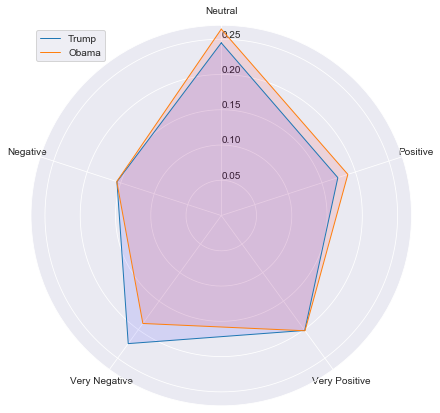

In [48]:
comment_plot(obama_centrality, trump_centrality)
plt.savefig(r'Visualisations/5_nlp_analysis.png', bbox_inches='tight')
plt.show()